# <font color=darkblue>Machine Learning Project: default of credit card clients </font>

**Membres du groupe :**  
* Houaida Fatma Karoui
* Aicha Chaaba
* Molka Mrad
* Yassine Kochat
* Firas Kahia
* Houssem Ouerdiane



**Classe:**
4DS1


<font  color=black> **- Importation des bibliotheques** </font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



<font color=black> **- Importer notre dataset** </font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/default of credit card clients.xls'
alldata=pd.read_excel(path)


alldata

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# I. Nettoyage des données

**- Afficher les dimensions de notre DataFrame**

In [ ]:
alldata.shape

(30001, 25)

<font color=black> **- Afficher les 5 premiers observations** </font>

In [ ]:
#afficher les 5 premiers observations
alldata.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


<font color=black> **-  Afficher les 5 derniers observations** </font>

In [ ]:
alldata.tail(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


<font color=black> **- Identifier les valeurs NAN** </font>

In [ ]:
alldata.isnull().values.any() 

False

<font color=red> **=> On remarque qu'on n'a pas de valeurs NAN, donc on aura pas besoin de l'imputation des données**</font>

<font color=black> **- Identifier les noms de chaque features** </font>


In [ ]:
alldata.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

<font color=black> **- Changer les noms du chaque colonne** </font>


In [ ]:
alldata.columns=alldata.iloc[0]
newdata=alldata.drop(0)

In [ ]:
# Affichage des nouveaux noms des features  
newdata.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

<font color=black> **- Description de dataset** </font>

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

<font color=red> **=> Tous les données de notre DataSet sont de type Object donc on doit les transformer en entier**</font>

**- Transformer le type de chaque colonne de object vers numerique**

In [ ]:
newdata=newdata.apply(pd.to_numeric)

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**- Indexer la colonne ID et supprimer la numérotation**


In [ ]:
newdata.set_index(newdata.columns[0],inplace=True) 




In [ ]:
newdata

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


<font color=red> **=> On remarque dans notre DataFrame le statut de remboursement est indiqué dans les colonnes de PAY_0 à PAY_6 mais avoir la colone PAY_1 alors on va renomer le features PAY_0 en PAY_1 pour faciliter la compréhension.**</font>


In [ ]:
# Renomer la colonne PAY_0 
newdata.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
newdata

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


**-Vérification de nombre de zéro dans chaque feature**

In [ ]:
features_Nb0 =newdata.iloc[:,:-1].isin([0]).sum(axis=0)
features_Nb0

0
LIMIT_BAL        0
SEX              0
EDUCATION       14
MARRIAGE        54
AGE              0
PAY_1        14737
PAY_2        15730
PAY_3        15764
PAY_4        16455
PAY_5        16947
PAY_6        16286
BILL_AMT1     2008
BILL_AMT2     2506
BILL_AMT3     2870
BILL_AMT4     3195
BILL_AMT5     3506
BILL_AMT6     4020
PAY_AMT1      5249
PAY_AMT2      5396
PAY_AMT3      5968
PAY_AMT4      6408
PAY_AMT5      6703
PAY_AMT6      7173
dtype: int64

<font color=red> **=>  on constate que pour les colonnes de PAY_1 vers PAY_6 admettent un grand nombre de 0 ce qui signifie que environ la moitié des clients ont un status 'The use of revolving credit'**</font>

**- Afficher le nombre d'observation pour chaque valeur unique dans la colonne "default payment next month"**


In [ ]:
# Numériquement
print(newdata.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


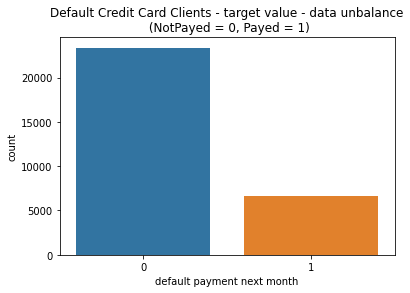

In [ ]:
# Graphiquement
import seaborn as sns 
sns.countplot(newdata['default payment next month'] , label='Count')
plt.title('Default Credit Card Clients - target value - data unbalance\n (NotPayed = 0, Payed = 1)')
plt.show()

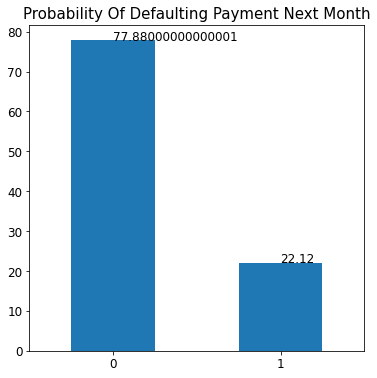

In [ ]:
#Tester la probabilité de risques de défaillance le mois prochain en %

Payment_count = (newdata['default payment next month'].value_counts(normalize=True)*100)
Payment_count.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],Payment_count):
    plt.text(x,y,y,fontsize=12)
plt.show()



<font color=red> **=> Nous pouvons voir que de 77% des clients ne vont pas payer le mois prochain alors que 23% des clients vont payer.**</font>


**- Affichage des features 'Sex','Age','Marriage' et 'Education en fonction du feature 'default payment next month' numériquement et graphiquement**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


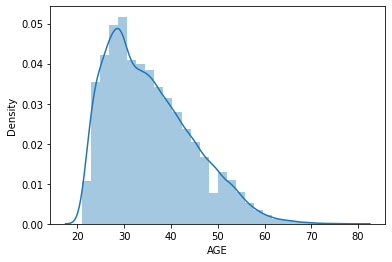

In [ ]:
sns.distplot(newdata['AGE'],kde=True,bins=30)


<font color=red> **=>  La plus part de nos client sont compris entre l'age 25 et 40ans.**</font>

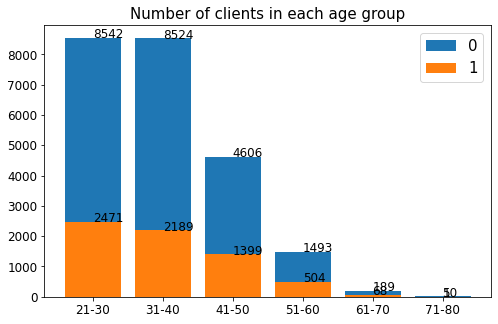

In [ ]:
#Vérifier le nombre d'age des clients dans chaque groupe
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
newdata['AGE_BIN'] = pd.cut(x=newdata.AGE, bins=bins, labels=names, right=True)

age_cnt = newdata.AGE_BIN.value_counts()
age_0 = (newdata.AGE_BIN[newdata['default payment next month'] == 0].value_counts())
age_1 = (newdata.AGE_BIN[newdata['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

<font color=red> **=> Alors on remarque ici que nous avons un maximum de clients dont la tranche d'age est 21 à 30 ans suivis de 31 à 40 ans. Par conséquent, avec l'augmentation du groupe d'âge, le nombre de clients qui feront default payment next month diminue. En effet, nous pouvons voir que l'âge est une caractéristique importante pour prédire default payment next month.De plus, pratiquement les clients qui ne vont pas payer sont superieurs à ceux qui vont payés.** </font>


In [ ]:
# voir la categorie du Sex par rapport au lable, c'est à dire voir le nombre de femme et homme qui vont payer le mois prochain ou non  
gender = newdata.groupby(['SEX','default payment next month']).size().unstack(1).T
gender

SEX,1,2
default payment next month,,
0,9015,14349
1,2873,3763


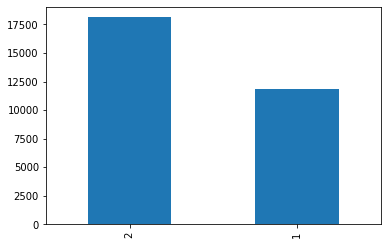

In [ ]:
newdata['SEX'].value_counts().plot.bar()


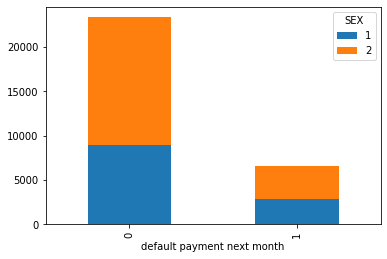

In [ ]:
# Graphiquement
gender.plot(kind='bar', stacked = True)


<font color=red> **=> on constate que les femmes qui ne vont pas payées le mois prochain sont plus nombreux que les hommes ,de meme pour les ceux qui vont payés le mois prochain mais avec une légere differnce**</font>


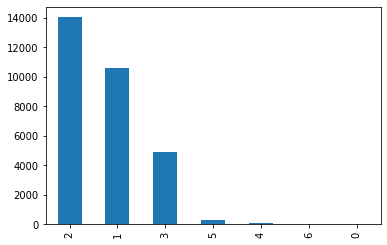

In [ ]:
newdata['EDUCATION'].value_counts().plot.bar()

<font color=red> **=> La majoritée des clients ont un niveau d'éducation qui appartient aux catégories 1 =écoles supérieur  2 = université et 3 = lycée**</font>


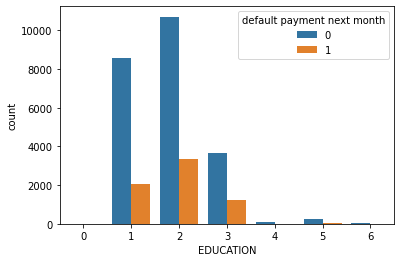

In [ ]:
sns.countplot(x='EDUCATION',data=newdata,hue="default payment next month")

<font color=red> **=> Les clients de la 2éme catégories (univérsité) sont les plus suceptibles de ne pas payer ainsi que la 1ére catégorie(école supérieur)**</font>


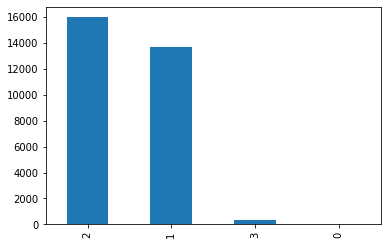

In [ ]:
newdata['MARRIAGE'].value_counts().plot.bar()


In [ ]:
# voir la categorie du Sex par rapport au lable, c'est à dire voir le nombre de femme et homme qui vont payer le mois prochain ou non  
MarriageStatus = newdata.groupby(['MARRIAGE','default payment next month']).size().unstack(1).T
MarriageStatus

MARRIAGE,0,1,2,3
default payment next month,,,,
0,49,10453,12623,239
1,5,3206,3341,84


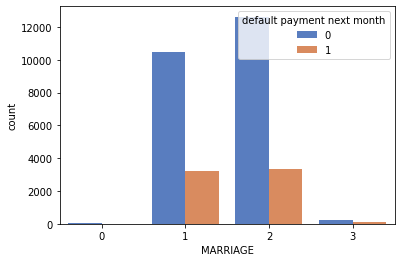

In [ ]:
# Graphiquement 
#MarriageStatus.plot(kind='bar', stacked = True)
sns.countplot(x='MARRIAGE',data=newdata,hue="default payment next month", palette="muted")

<font color=red> **=> Alors ici il semble que les personnes mariées soient les plus susceptibles de ne pas payer le mois prochain.De plus, concernant les autres personnes (status 'other') ainsi que les personnes divorcées sont pratiquement négligable par rapport aux mariés et single ce qui implique qu'ils sont moins pertinente que les autres.**</font>


#### - Les features 'SEX','Marriage','Age' et 'Education' sont des features catégoriques on va donc diviser notre DataSet on données numérique et categorique

In [ ]:
# on va diviser les features on va diviser les features en deux catégories
newdata=newdata.drop(newdata.columns[-1],axis=1)
newdata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
# on a fait une extraction des données numériques de notre dataFrame  
Features_Numerique =newdata[["LIMIT_BAL" ,"AGE" ,  "BILL_AMT1" , "BILL_AMT2" , "BILL_AMT3" , "BILL_AMT4" , "BILL_AMT5" ,"BILL_AMT6",
                      "PAY_AMT1" , "PAY_AMT2" , "PAY_AMT3" ,"PAY_AMT4" ,"PAY_AMT5" , "PAY_AMT6"]]

In [ ]:
# on a fait une extraction des données catégoriques de notre dataFrame  
Features_Categorique=newdata[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default payment next month']]

In [ ]:
for c in Features_Categorique:
    print(f'{c :-<50} {newdata[c].unique()}')

SEX----------------------------------------------- [2 1]
EDUCATION----------------------------------------- [2 1 3 5 4 6 0]
MARRIAGE------------------------------------------ [1 2 3 0]
PAY_1--------------------------------------------- [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2--------------------------------------------- [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3--------------------------------------------- [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4--------------------------------------------- [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5--------------------------------------------- [-2  0 -1  2  3  5  4  7  8  6]
PAY_6--------------------------------------------- [-2  2  0 -1  3  6  4  7  8  5]
default payment next month------------------------ [1 0]


In [ ]:
#for col in Features_Numerique:
  #  plt.figure()
  #  newdata[col].value_counts().plot.pie()
    

**On va étudier La normalisation**

In [ ]:
#Vérification de la normalisation
newdata.describe().T


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**- Matrice de Correlation de tous les features en mode graphique**


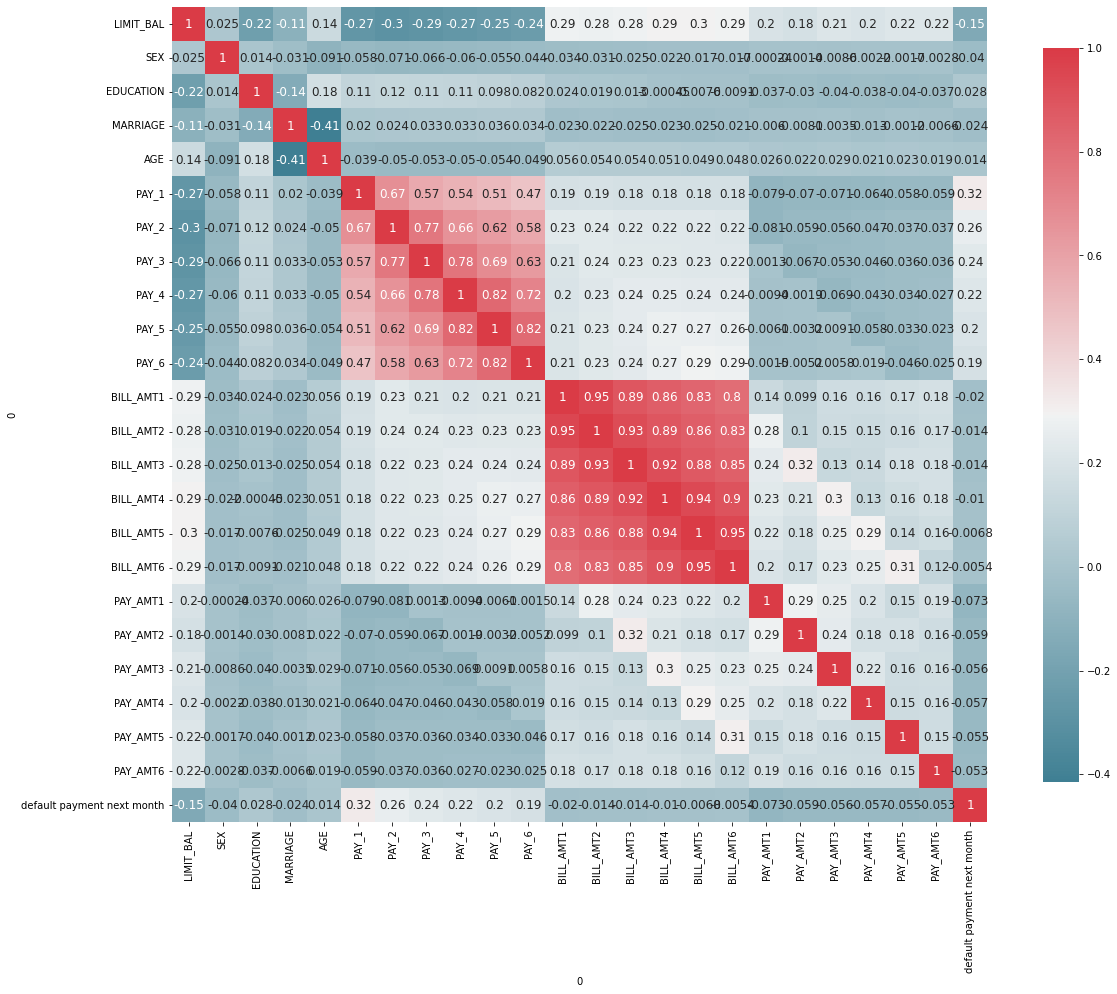

In [ ]:

def plot_correlation_map( newData ):

    corr = newdata.corr()

    s , ax = plt.subplots( figsize =( 20 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(newdata)

<font color=red> **=> il y a une corrélation assez positive, les BILL_AMT1 à 6 sont très positivement corrélés de meme les PAY1 à 6 sont également corréles. Cela montre à quel point ils sont en retard dans leurs paiements et cela a du sens car si vous êtes en retard sur l'un, vous serez en retard sur les autres.
Le mariage et l'âge sont corrélées négativement mais cela n'ajoute rien.**</font>

**- Supprimer les nombre des lignes dupliques**

In [ ]:
# Suppression des observations dupliquées
# len(newdata[newdata.duplicated()])
newdata.drop_duplicates(inplace = True )
len(newdata)

29965

<font color=red> **=> Avant la suppression on eu 35 observations dupliqués**</font>

**- Standardisation des colonnes numériques**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Features_Numerique = ["LIMIT_BAL" ,"AGE" ,  "BILL_AMT1" , "BILL_AMT2" , "BILL_AMT3" , "BILL_AMT4" , "BILL_AMT5" ,"BILL_AMT6",
                      "PAY_AMT1" , "PAY_AMT2" , "PAY_AMT3" ,"PAY_AMT4" ,"PAY_AMT5" , "PAY_AMT6"]
transformed_numerical_features  = scaler.fit_transform(newdata[Features_Numerique])
df = pd.DataFrame(transformed_numerical_features,columns=Features_Numerique)
df

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136285,-1.246078,-0.643117,-0.648006,-0.668571,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562
1,-0.365619,-1.029141,-0.659830,-0.667347,-0.639841,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119
2,-0.596819,-0.161397,-0.299280,-0.494553,-0.483045,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453
3,-0.905085,0.164007,-0.058284,-0.014093,0.032047,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340
4,-0.905085,2.333368,-0.579253,-0.611935,-0.161927,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29960,0.405046,0.380943,1.869003,2.016713,2.325164,0.694467,-0.149982,-0.385023,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340
29961,-0.134420,0.814815,-0.673393,-0.665900,-0.628021,-0.533536,-0.578273,-0.653264,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562
29962,-1.059218,0.164007,-0.647842,-0.644438,-0.638746,-0.348632,-0.325182,-0.328336,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275
29963,-0.673885,0.597879,-0.718575,0.409339,0.421450,0.147013,-0.468681,0.168314,4.841417,-0.109269,-0.230113,-0.185376,3.150512,-0.192138


<font color=red> **=> La normalisation des données a été effectuée ;  toutes les caractéristiques sont centrées autour de zéro.**</font>

**- Afficher le box plot pour voir les valeurs aberrantes**

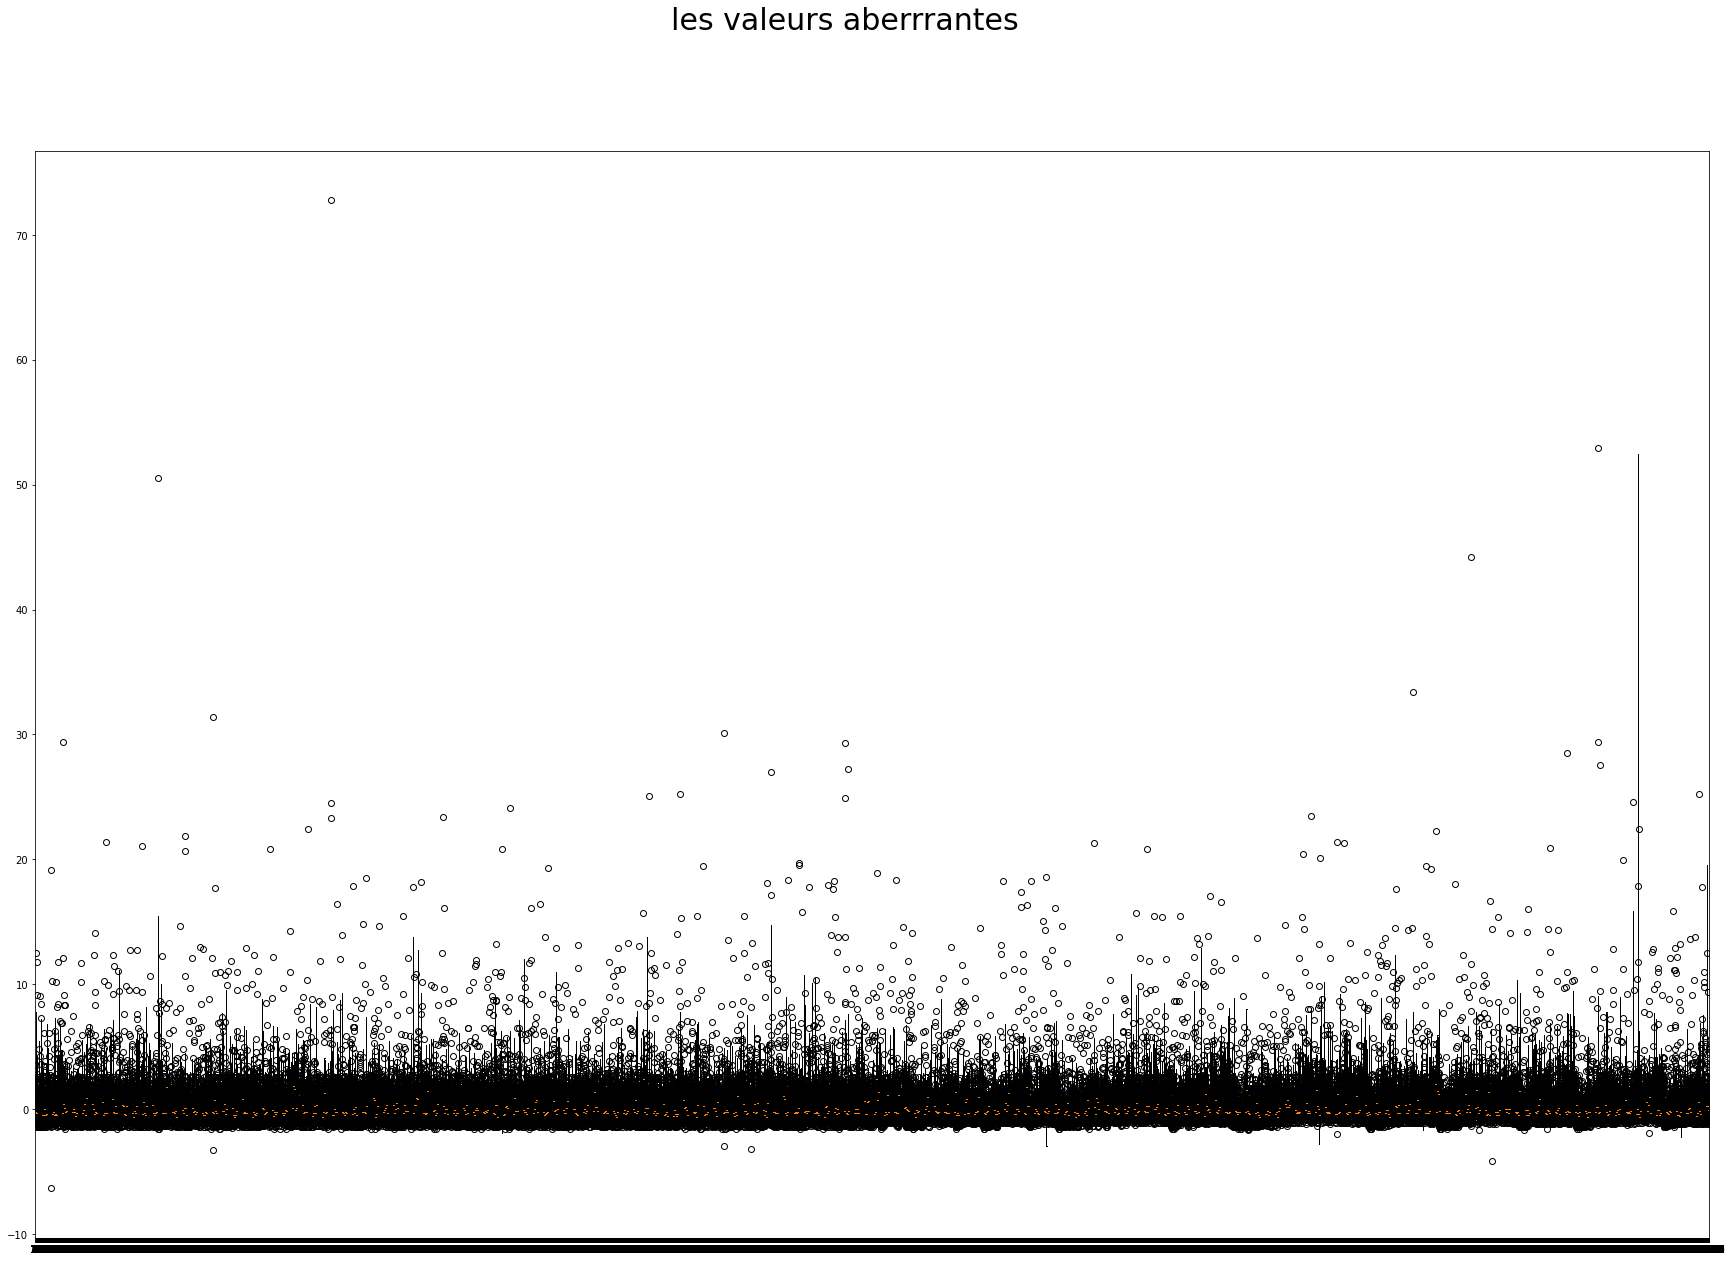

In [ ]:
fig,ax = plt.subplots(figsize = (30 ,20))
ax.boxplot(df)
fig.suptitle("les valeurs aberrrantes" , fontsize = 30);


**- Extraire les valeurs en utilisant la méthode de Inter Quantile Range IQR**

In [ ]:
Quantile1 = newdata[Features_Numerique].quantile(0.25)
Quantile3 = newdata[Features_Numerique].quantile(0.75)
IQR = Quantile3 - Quantile1 
outliers_dataframe = pd.DataFrame((newdata[Features_Numerique] <  Quantile1 - 1.5 * IQR ) | (newdata[Features_Numerique] > Quantile3  + 1.5 * IQR))
outliers_dataframe

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,True,True,True,False,False,False,False,True,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,True,False,False,False


<font color=red> **=> On a tester les valeurs aberantes lorsuqe on trouve 'true' il s'agit d'une valeur aberantes,
 donc on va les convertir en des valeurs binaires**</font>

In [ ]:
outliers_dataframe_int  = outliers_dataframe.astype(int)
outliers_dataframe_int

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0,0,1,1,1,0,0,0,0,1,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**- Créer une fonction qui détecte les lignes qui ont plus que 4 valeurs aberrantes et retourne une nouvelle dataframe sans ces lignes et afficher le nombre de lignes effacées**

In [ ]:
def drop_outliers(data):
    dropped_rows = 0
    for i in data.index:
        outlier_count = 0
        outlier_count = data.loc[i , : ].sum()
        if outlier_count >= 4: 
            dropped_rows += 1
            data.drop(i , axis = 0 ,inplace = True)
    return (data,dropped_rows)
            

<font color=red> **=> Nous avons créé un nouveau dataframe(data) sans label afin que nous ne soyons pas confus et si nous avons plus de 4 features considérées comme des valeurs aberrantes, cette ligne doit être supprimée et remplacée par la ligne suivante**</font>

In [ ]:
data, dropped_rows = drop_outliers(outliers_dataframe_int)

In [ ]:
data

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,1,0,0,0


**- Extraction les indices des lignes restantes après le nettoyage des données**

In [ ]:
data_index = np.array(data.index)

In [ ]:
df_with_no_outlier_rows = newdata.loc[data_index]
df_with_no_outlier_rows

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,2,2,34,2,2,2,2,2,2,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
# les dimensions de la nouvelle dataSet aprés le nettoyage
df_with_no_outlier_rows.shape

(26533, 24)

In [ ]:
df_with_no_outlier_rows.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

<font color=red> **=> Voici les nouveaux dimension de notre DataSet**</font>

# <font  color=black>  Conculsion </font>

<font color=red> **=> Nous avons **26533** lignes séparées sur 24 colonnes avec le plus petit nombre de valeurs aberrantes possible ...**</font>

# <font  color=black>  Encodoge </font>

#### -- Encodage des features PAY_1 à PAY_6




In [ ]:
df_with_no_outlier_rows['PAY_1'].value_counts()


 0    12515
-1     5222
 1     3478
-2     2525
 2     2366
 3      308
 4       68
 5       22
 8       14
 6       10
 7        5
Name: PAY_1, dtype: int64

In [ ]:
modif = (df_with_no_outlier_rows.PAY_1 == -2) | (df_with_no_outlier_rows.PAY_1 == -1) | (df_with_no_outlier_rows.PAY_1 == 0)
df_with_no_outlier_rows.loc[modif, 'PAY_1'] = 0
modif = (df_with_no_outlier_rows.PAY_2 == -2) | (df_with_no_outlier_rows.PAY_2 == -1) | (df_with_no_outlier_rows.PAY_2 == 0)
df_with_no_outlier_rows.loc[modif, 'PAY_2'] = 0
modif = (df_with_no_outlier_rows.PAY_3 == -2) | (df_with_no_outlier_rows.PAY_3 == -1) | (df_with_no_outlier_rows.PAY_3 == 0)
df_with_no_outlier_rows.loc[modif, 'PAY_3'] = 0
modif = (df_with_no_outlier_rows.PAY_4 == -2) | (df_with_no_outlier_rows.PAY_4 == -1) | (df_with_no_outlier_rows.PAY_4 == 0)
df_with_no_outlier_rows.loc[modif, 'PAY_4'] = 0
modif = (df_with_no_outlier_rows.PAY_5 == -2) | (df_with_no_outlier_rows.PAY_5 == -1) | (df_with_no_outlier_rows.PAY_5 == 0)
df_with_no_outlier_rows.loc[modif, 'PAY_5'] = 0
modif = (df_with_no_outlier_rows.PAY_6 == -2) | (df_with_no_outlier_rows.PAY_6 == -1) | (df_with_no_outlier_rows.PAY_6 == 0)
df_with_no_outlier_rows.loc[modif, 'PAY_6'] = 0
MAJ = df_with_no_outlier_rows[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
df_with_no_outlier_rows.loc[df_with_no_outlier_rows.PAY_1 > 0, 'PAY_1'] = 1
df_with_no_outlier_rows.loc[df_with_no_outlier_rows.PAY_2 > 0, 'PAY_2'] = 1
df_with_no_outlier_rows.loc[df_with_no_outlier_rows.PAY_3 > 0, 'PAY_3'] = 1
df_with_no_outlier_rows.loc[df_with_no_outlier_rows.PAY_4 > 0, 'PAY_4'] = 1
df_with_no_outlier_rows.loc[df_with_no_outlier_rows.PAY_5 > 0, 'PAY_5'] = 1
df_with_no_outlier_rows.loc[df_with_no_outlier_rows.PAY_6 > 0, 'PAY_6'] = 1
MAJ = df_with_no_outlier_rows[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
df_with_no_outlier_rows

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,2,2,34,1,1,1,1,1,1,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,150000,1,3,2,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,1,1,1,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


#### => Pour les features PAY_1 à PAY_6 sont des features catégoriques dont  :

*   -1 ,-2, 0 : pour dire tout est reglé (pas de retard de payement)
*    1,2,3,4,5,6,7,8 : pour le retart de paiment 
####donc on a decidé de mettre les clients dont leurs status est reglée à 0 et les autres à 1 




In [ ]:
features_PAY_0 =df_with_no_outlier_rows.iloc[:,5:11].isin([0]).sum(axis=0)
features_PAY_0

0
PAY_1    20262
PAY_2    22472
PAY_3    22663
PAY_4    23305
PAY_5    23818
PAY_6    23729
dtype: int64

In [ ]:
features_PAY_1 =df_with_no_outlier_rows.iloc[:,5:11].isin([1]).sum(axis=0)
features_PAY_1



0
PAY_1    6271
PAY_2    4061
PAY_3    3870
PAY_4    3228
PAY_5    2715
PAY_6    2804
dtype: int64

#### -- Encodage de la colonne Education

In [ ]:

df_with_no_outlier_rows['EDUCATION'].value_counts()

2    12590
1     9060
3     4503
5      223
4      104
6       40
0       13
Name: EDUCATION, dtype: int64

In [ ]:
df_with_no_outlier_rows['EDUCATION']=np.where(df_with_no_outlier_rows['EDUCATION'] == 5, 4, df_with_no_outlier_rows['EDUCATION'])
df_with_no_outlier_rows['EDUCATION']=np.where(df_with_no_outlier_rows['EDUCATION'] == 6, 4, df_with_no_outlier_rows['EDUCATION'])
df_with_no_outlier_rows['EDUCATION']=np.where(df_with_no_outlier_rows['EDUCATION'] == 0, 4, df_with_no_outlier_rows['EDUCATION'])
df_with_no_outlier_rows['EDUCATION'].unique()

array([2, 1, 3, 4])

In [ ]:
def onehot_encode(df_with_no_outlier_rows , column_dict):
    df_with_no_outlier_rows = df_with_no_outlier_rows.copy()
    for col ,prefix in column_dict.items():
        dummies = pd.get_dummies(df_with_no_outlier_rows[col], prefix = prefix )
        df_with_no_outlier_rows = pd.concat([df_with_no_outlier_rows , dummies] , axis = 1)
        df_with_no_outlier_rows = df_with_no_outlier_rows.drop(col , axis = 1)
    return df_with_no_outlier_rows

In [ ]:
df_with_no_outlier_rows = onehot_encode(df_with_no_outlier_rows , {"EDUCATION" : "EDU_TYPE"})

In [ ]:
df_with_no_outlier_rows

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDU_TYPE_1,EDU_TYPE_2,EDU_TYPE_3,EDU_TYPE_4
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,1,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0
2,120000,2,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0
3,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0
4,50000,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0
5,50000,1,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,2,34,1,1,1,1,1,1,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1,0,1,0,0
29997,150000,1,2,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,1,0
29998,30000,1,2,37,1,1,1,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0,1,0,0


#### => Pour la colonne EDUCATION dont les valeurs sont 4,5,6 sont inconnues donc on les a rassemblé dans la colonne 4 et aprés on a effectuer l'encodage les valeurs 1,2,3,4 sont devenus sous la forme binaires.



### -- Encodage de la colonne Marriage

In [ ]:
df_with_no_outlier_rows['MARRIAGE'].value_counts()

2    14268
1    11908
3      303
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df_with_no_outlier_rows = onehot_encode(df_with_no_outlier_rows , {"MARRIAGE" : "Mar_TYPE"})

In [ ]:
df_with_no_outlier_rows

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDU_TYPE_1,EDU_TYPE_2,EDU_TYPE_3,EDU_TYPE_4,Mar_TYPE_0,Mar_TYPE_1,Mar_TYPE_2,Mar_TYPE_3
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,0,0
2,120000,2,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,1,0,0
5,50000,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,34,1,1,1,1,1,1,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1,0,1,0,0,0,0,1,0
29997,150000,1,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0,0,1,0,0,0,1,0
29998,30000,1,37,1,1,1,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0,1,0,0,0,0,1,0


#### => Pour la colonne MARRIAGE dont les valeurs sont 1,2,3 dont on a effectuer l'encodage pourqu'il deviennet sous la forme binaires.



In [ ]:
permut_1 = df_with_no_outlier_rows[["LIMIT_BAL" ,"SEX"]]
permut_2 = df_with_no_outlier_rows[["EDU_TYPE_1","EDU_TYPE_2","EDU_TYPE_3","EDU_TYPE_4","Mar_TYPE_0","Mar_TYPE_1","Mar_TYPE_2","Mar_TYPE_3"]]
df_with_no_outlier_rows = pd.concat([permut_2,df_with_no_outlier_rows.drop(["LIMIT_BAL" ,"SEX","EDU_TYPE_1","EDU_TYPE_2","EDU_TYPE_3","EDU_TYPE_4","Mar_TYPE_0","Mar_TYPE_1","Mar_TYPE_2","Mar_TYPE_3"],axis = 1)],axis = 1)

In [ ]:
df_with_no_outlier_rows = pd.concat([permut_1 , df_with_no_outlier_rows] ,axis = 1) 
df_with_no_outlier_rows

,LIMIT_BAL,SEX,EDU_TYPE_1,EDU_TYPE_2,EDU_TYPE_3,EDU_TYPE_4,Mar_TYPE_0,Mar_TYPE_1,Mar_TYPE_2,Mar_TYPE_3,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,0,1,0,0,0,1,0,0,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,0,1,0,0,0,0,1,0,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,0,1,0,0,0,0,1,0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,0,1,0,0,0,1,0,0,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,1,0,0,0,1,0,0,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,0,1,0,0,0,0,1,0,34,1,1,1,1,1,1,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,150000,1,0,0,1,0,0,0,1,0,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,1,0,0,0,0,1,0,37,1,1,1,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [ ]:
df_with_no_outlier_rows = df_with_no_outlier_rows.drop(["EDU_TYPE_4" ,"Mar_TYPE_0"] , axis = 1)
df_with_no_outlier_rows

,LIMIT_BAL,SEX,EDU_TYPE_1,EDU_TYPE_2,EDU_TYPE_3,Mar_TYPE_1,Mar_TYPE_2,Mar_TYPE_3,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,0,1,0,1,0,0,24,1,1,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,0,1,0,0,1,0,26,0,1,0,0,0,1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,0,1,0,0,1,0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,0,1,0,1,0,0,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,0,1,0,1,0,0,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,0,1,0,0,1,0,34,1,1,1,1,1,1,72557,77708,79384,77519,82607,81158,7000,3500,0,7000,0,4000,1
29997,150000,1,0,0,1,0,1,0,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,0,1,0,0,1,0,37,1,1,1,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


#### => Les deux features EDU_TYPE_4, MAR_TYPE_0 sont tous des 0 donc on les a supprimer

#Modélisation


In [ ]:
df_with_no_outlier_rows.columns


Index(['LIMIT_BAL', 'SEX', 'EDU_TYPE_1', 'EDU_TYPE_2', 'EDU_TYPE_3',
       'EDU_TYPE_4', 'Mar_TYPE_0', 'Mar_TYPE_1', 'Mar_TYPE_2', 'Mar_TYPE_3',
       'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [ ]:
df=df_with_no_outlier_rows

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y=df.iloc[:,-1]
X=df.drop("default payment next month",axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
Y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29995    1
29997    0
29998    1
29999    1
30000    1
Name: default payment next month, Length: 26533, dtype: int64

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(Y_test,y_pred))
    print(classification_report(Y_test,y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, Y_train,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='Validation score')
    plt.legend()


In [ ]:
preprocessor = make_pipeline( SelectKBest(f_classif, k=10))

In [ ]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
LogisticRegression = make_pipeline(preprocessor, LogisticRegression())
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
NaiveBayes_BernoulliNB = make_pipeline(preprocessor, BernoulliNB())

In [ ]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost': AdaBoost,
                  'SVM': SVM,
                  'KNN':  KNN,
                  'LogisticRegression' : LogisticRegression,
                  'DecisionTree' : DecisionTree,
                  'NaiveBayes_BernoulliNB' :NaiveBayes_BernoulliNB
                 }

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

RandomForest


NameError: ignored

#### =>  on a tester on 1er lieu les 6 algorithmes :
 *  AdaBoost ,SVM, KNN, LogisticRegression, DecisionTree, NaiveBayes_BernoulliNB 
#### dont on un a eu un f1_score trop bas vu le désiquilibre du notre dataSet donc on va proceder par la méthode du OverSampling  





## ***OverSampling***

In [ ]:
nbr_label_0,nbr_label_1 = df["default payment next month"].value_counts()
nbr_label_0,nbr_label_1

(20473, 6060)

In [ ]:
df_label_0= df[df ["default payment next month"] == 0 ]
df_label_1 = df[df ["default payment next month"] == 1 ]

In [ ]:
df_label_1_over = df_label_1.sample(nbr_label_0, replace = True)
df_testing_1 = pd.concat([df_label_0,df_label_1_over], axis = 0)
df_testing_1 = df_testing_1.sample(frac = 1)

In [ ]:
def evaluation_2(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
   


  #  N, train_score, val_score = learning_curve(model, X_train, y_train,
                                          #     cv=4, scoring='f1',
                                           #    train_sizes=np.linspace(0.1,1,10))
  #  plt.figure(figsize=(12,8))
  #  plt.plot(N, train_score.mean(axis=1), label='train score')
  #  plt.plot(N, val_score.mean(axis=1), label='Validation score')
  #  plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split


X = df_testing_1.drop("default payment next month", axis =1)
y = df_testing_1["default payment next month"]

standardScaler = StandardScaler()
X_scaled = pd.DataFrame(standardScaler.fit_transform(X) , columns = X.columns) 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=0)


for name, model in dict_of_models.items():
    print(name)
    evaluation_2(model)
   #results[name] = f1_score(y_test, evaluation_2.y_pred)

RandomForest
[[3445  650]
 [ 188 3907]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4095
           1       0.86      0.95      0.90      4095

    accuracy                           0.90      8190
   macro avg       0.90      0.90      0.90      8190
weighted avg       0.90      0.90      0.90      8190

AdaBoost
[[3305  790]
 [1703 2392]]
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      4095
           1       0.75      0.58      0.66      4095

    accuracy                           0.70      8190
   macro avg       0.71      0.70      0.69      8190
weighted avg       0.71      0.70      0.69      8190

SVM
[[3222  873]
 [1603 2492]]
              precision    recall  f1-score   support

           0       0.67      0.79      0.72      4095
           1       0.74      0.61      0.67      4095

    accuracy                           0.70      8190
   macro avg       0.

### **Comparaison Par courbe ROC et par f1_score** 

In [ ]:
def evaluation_Roc(model,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred)
    auc1 = metrics.roc_auc_score(y_test, y_pred)

    plt.figure(figsize=(10,7))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1,tpr1,label=name+" auc="+str(round(auc1,2)))

    plt.legend(loc=4, title='Models', facecolor='white')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  
    plt.title('ROC', size=15)
    plt.box(False)
    plt.savefig('ImageName', format='png', dpi=200, transparent=True);

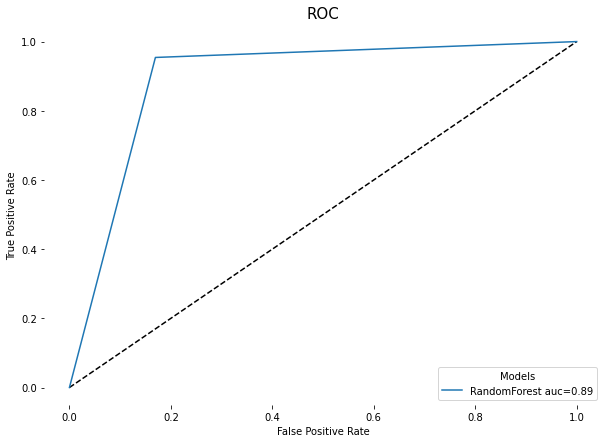

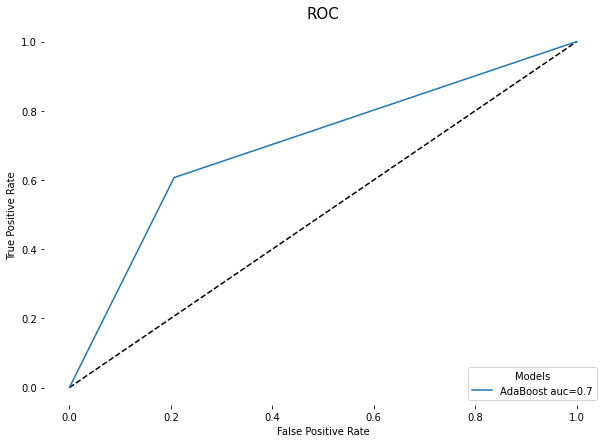

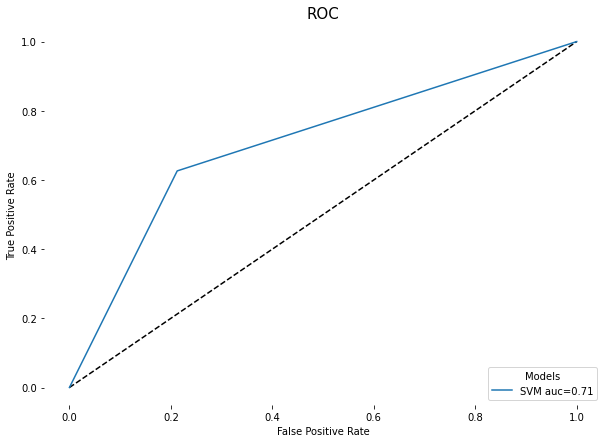

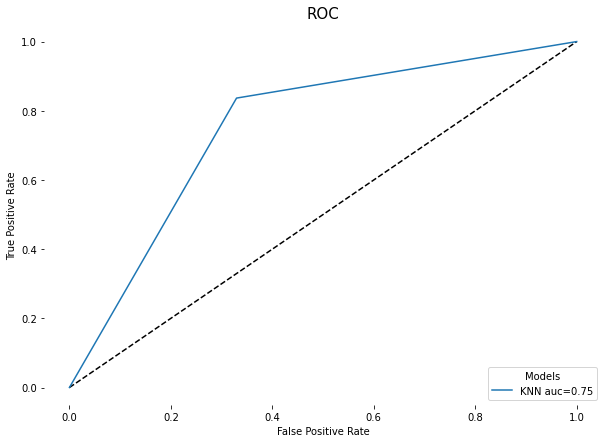

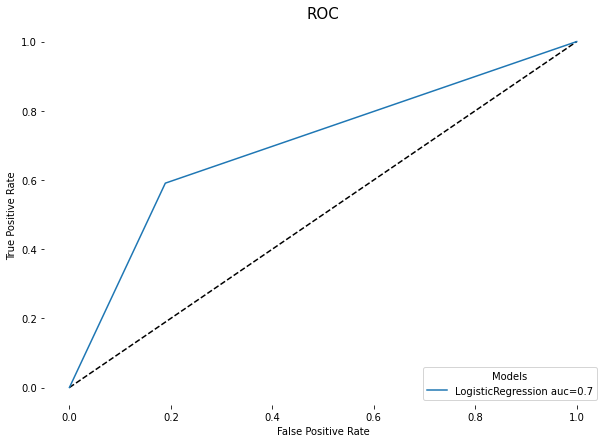

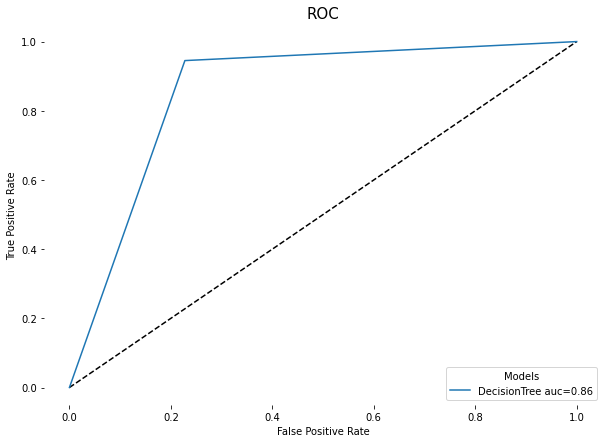

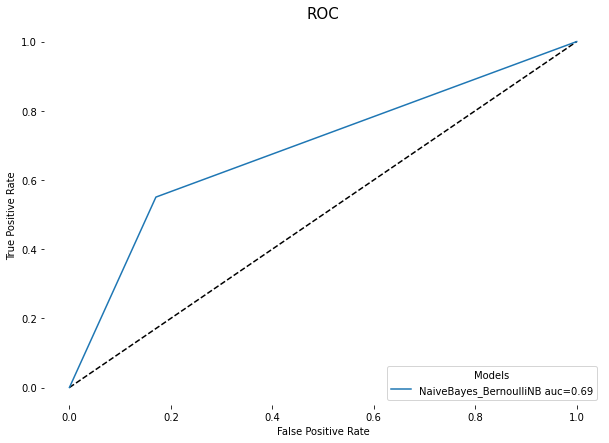

In [ ]:
from sklearn import metrics 
for name, model in dict_of_models.items():
  
    evaluation_Roc(model,name)
  

In [ ]:
def evaluation_F1_score(model,name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    results = {}
    results[name] = f1_score(y_test, y_pred)

    compare_metrics = pd.DataFrame({ "oversampling":results})
    print(compare_metrics)


In [ ]:
for name, model in dict_of_models.items():
  
    evaluation_F1_score(model,name)

              oversampling
RandomForest      0.898574
          oversampling
AdaBoost       0.66936
     oversampling
SVM        0.6811
     oversampling
KNN      0.772492
                    oversampling
LogisticRegression      0.663831
              oversampling
DecisionTree      0.869956
                        oversampling
NaiveBayes_BernoulliNB      0.639705


##### **=> D'apres les courbes ROC ainsi que le f1_score on remarque que le RandomForest et DecisionTree ont le meilleur auc et f1_score respectivement : 0.89 et 0.86 .**

##**Optimisation** 

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

grid_Parm_LogReg = {'C': np.logspace(-2,6,10)}

log_reg = LogisticRegression()

grid_Log_reg = RandomizedSearchCV(log_reg,grid_Parm_LogReg , cv=5, random_state=0,scoring = "recall")

grid_Log_reg.fit(X_train, y_train)

print(f"Parameters Logistic Regression : {grid_Log_reg.best_params_}") 

y_pred = grid_Log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
f1 = f1_score(y_pred,y_test)
print(f1)





Parameters Logistic Regression : {'C': 4.6415888336127775}
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      4095
           1       0.75      0.60      0.67      4095

    accuracy                           0.70      8190
   macro avg       0.71      0.70      0.70      8190
weighted avg       0.71      0.70      0.70      8190

0.6677555464815572


### AdaBoost

In [170]:
AdaBoost.get_params()

{'adaboostclassifier': AdaBoostClassifier(random_state=0),
 'adaboostclassifier__algorithm': 'SAMME.R',
 'adaboostclassifier__base_estimator': None,
 'adaboostclassifier__learning_rate': 1.0,
 'adaboostclassifier__n_estimators': 50,
 'adaboostclassifier__random_state': 0,
 'memory': None,
 'pipeline': Pipeline(steps=[('selectkbest', SelectKBest())]),
 'pipeline__memory': None,
 'pipeline__selectkbest': SelectKBest(),
 'pipeline__selectkbest__k': 10,
 'pipeline__selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif>,
 'pipeline__steps': [('selectkbest', SelectKBest())],
 'pipeline__verbose': False,
 'steps': [('pipeline', Pipeline(steps=[('selectkbest', SelectKBest())])),
  ('adaboostclassifier', AdaBoostClassifier(random_state=0))],
 'verbose': False}

In [171]:
hyper_params_AdaBoost = {'adaboostclassifier__n_estimators':[450,400, 500, 550, 600],
                         'adaboostclassifier__learning_rate':[0.0001,0.001,0.01,0.1],
                         'adaboostclassifier__algorithm':["SAMME","SAMME.R"],
                         'pipeline__selectkbest__k':range(13,18)
                         }

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

grid_AdaBoost = RandomizedSearchCV(AdaBoost, hyper_params_AdaBoost, scoring='recall', cv=4,n_iter=40)
grid_AdaBoost.fit(X_train,y_train)
print(grid_AdaBoost.best_params_)

y_pred = grid_AdaBoost.predict(X_test)
print(classification_report(y_test, y_pred))

f1=f1_score(y_pred,y_test)
print(f1)

KeyboardInterrupt: ignored

### RandomizedForest

In [ ]:
RandomForest.get_params()

In [ ]:
hyper_params_RandomForest={
                       'randomforestclassifier__n_estimators': [100,150,200,250,300],
                       'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
                       'randomforestclassifier__max_depth' : [7,8,9,10],
                       'randomforestclassifier__min_samples_split': [8,10,12,14],
                       'randomforestclassifier__criterion' :['gini', 'entropy'],
                       'randomforestclassifier__bootstrap': [True, False],
                       'selectkbest__k':range(14,18),
             }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score


grid_RandomForest=RandomizedSearchCV(RandomForest,hyper_params_RandomForest,scoring='recall',cv=5,n_iter=60)

grid_RandomForest.fit(X_train,y_train)
print(grid_RandomForest.best_params_)

y_pred = grid_RandomForest.predict(X_test)
print(classification_report(y_test,y_pred))

f1=f1_score(y_pred,Y_test)
print(f1)

### SVM

In [ ]:
SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
hyper_params-svm={'svc__gamma': [1e-3,1e-4,1e-5],
              'svc__C':[1,10,50,100],
              'selectkbest__k':range(3,20),
             }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

grid_RandomForest=RandomizedSearchCV(RandomForest,hyper_params_RandomForest,scoring='recall',cv=5,n_iter=60)

grid_RandomForest.fit(X_train,y_train)
print(grid_RandomForest.best_params_)

y_pred = grid_RandomForest.predict(X_test)
print(classification_report(y_test,y_pred))

f1=f1_score(y_pred,Y_test)
print(f1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
